In [2]:
from fireTS.models import NARX
import pandas as pd
import os
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib notebook

# Load Data
The data is generated by the [type-1-diabetes simulator](https://github.com/jxx123/simglucose) I developed.

In [3]:
data = pd.read_csv(os.path.join('.', 'data', 'adolescent#001.csv'))
data = data.set_index('Time')
data.index = pd.to_datetime(data.index)

In [4]:
ytrain = data['CGM'].iloc[:1000]
Xtrain = data.loc[:, ['insulin', 'CGM']].iloc[:1000, :]

ytest = data['CGM'].iloc[1000:-1]
Xtest = data.loc[:, ['insulin', 'CGM']].iloc[1000:-1, :]

# Grid Search

In [5]:
para_grid = {
    'gamma': [0.001, 0.003, 0.005, 0.008, 0.01, 0.015, 0.03, 0.05],
    'C': [0.1, 0.3, 1, 3, 10, 30, 100],
    'epsilon': [0.001, 0.003, 0.005, 0.008, 0.01, 0.015, 0.03]
}

In [6]:
tsmdl = NARX(SVR(kernel='rbf'), auto_order=6, exog_order=[3, 3], exog_delay=[0, 0])
tsmdl.grid_search(Xtrain, ytrain, para_grid, verbose=2)

Fitting 3 folds for each of 392 candidates, totalling 1176 fits
[CV] C=0.1, epsilon=0.001, gamma=0.001 ...............................
[CV] ................ C=0.1, epsilon=0.001, gamma=0.001, total=   0.0s
[CV] C=0.1, epsilon=0.001, gamma=0.001 ...............................
[CV] ................ C=0.1, epsilon=0.001, gamma=0.001, total=   0.0s
[CV] C=0.1, epsilon=0.001, gamma=0.001 ...............................
[CV] ................ C=0.1, epsilon=0.001, gamma=0.001, total=   0.0s
[CV] C=0.1, epsilon=0.001, gamma=0.003 ...............................
[CV] ................ C=0.1, epsilon=0.001, gamma=0.003, total=   0.0s
[CV] C=0.1, epsilon=0.001, gamma=0.003 ...............................
[CV] ................ C=0.1, epsilon=0.001, gamma=0.003, total=   0.0s
[CV] C=0.1, epsilon=0.001, gamma=0.003 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ C=0.1, epsilon=0.001, gamma=0.003, total=   0.0s
[CV] C=0.1, epsilon=0.001, gamma=0.005 ...............................
[CV] ................ C=0.1, epsilon=0.001, gamma=0.005, total=   0.0s
[CV] C=0.1, epsilon=0.001, gamma=0.005 ...............................
[CV] ................ C=0.1, epsilon=0.001, gamma=0.005, total=   0.0s
[CV] C=0.1, epsilon=0.001, gamma=0.005 ...............................
[CV] ................ C=0.1, epsilon=0.001, gamma=0.005, total=   0.0s
[CV] C=0.1, epsilon=0.001, gamma=0.008 ...............................
[CV] ................ C=0.1, epsilon=0.001, gamma=0.008, total=   0.0s
[CV] C=0.1, epsilon=0.001, gamma=0.008 ...............................
[CV] ................ C=0.1, epsilon=0.001, gamma=0.008, total=   0.0s
[CV] C=0.1, epsilon=0.001, gamma=0.008 ...............................
[CV] ................ C=0.1, epsilon=0.001, gamma=0.008, total=   0.0s
[CV] C=0.1, epsilon=0.001, gamma=0.01 ................................
[CV] .

[CV] ................ C=0.1, epsilon=0.005, gamma=0.015, total=   0.0s
[CV] C=0.1, epsilon=0.005, gamma=0.03 ................................
[CV] ................. C=0.1, epsilon=0.005, gamma=0.03, total=   0.0s
[CV] C=0.1, epsilon=0.005, gamma=0.03 ................................
[CV] ................. C=0.1, epsilon=0.005, gamma=0.03, total=   0.0s
[CV] C=0.1, epsilon=0.005, gamma=0.03 ................................
[CV] ................. C=0.1, epsilon=0.005, gamma=0.03, total=   0.0s
[CV] C=0.1, epsilon=0.005, gamma=0.05 ................................
[CV] ................. C=0.1, epsilon=0.005, gamma=0.05, total=   0.0s
[CV] C=0.1, epsilon=0.005, gamma=0.05 ................................
[CV] ................. C=0.1, epsilon=0.005, gamma=0.05, total=   0.0s
[CV] C=0.1, epsilon=0.005, gamma=0.05 ................................
[CV] ................. C=0.1, epsilon=0.005, gamma=0.05, total=   0.0s
[CV] C=0.1, epsilon=0.008, gamma=0.001 ...............................
[CV] .

[CV] ................ C=0.1, epsilon=0.015, gamma=0.003, total=   0.0s
[CV] C=0.1, epsilon=0.015, gamma=0.005 ...............................
[CV] ................ C=0.1, epsilon=0.015, gamma=0.005, total=   0.0s
[CV] C=0.1, epsilon=0.015, gamma=0.005 ...............................
[CV] ................ C=0.1, epsilon=0.015, gamma=0.005, total=   0.0s
[CV] C=0.1, epsilon=0.015, gamma=0.005 ...............................
[CV] ................ C=0.1, epsilon=0.015, gamma=0.005, total=   0.0s
[CV] C=0.1, epsilon=0.015, gamma=0.008 ...............................
[CV] ................ C=0.1, epsilon=0.015, gamma=0.008, total=   0.0s
[CV] C=0.1, epsilon=0.015, gamma=0.008 ...............................
[CV] ................ C=0.1, epsilon=0.015, gamma=0.008, total=   0.0s
[CV] C=0.1, epsilon=0.015, gamma=0.008 ...............................
[CV] ................ C=0.1, epsilon=0.015, gamma=0.008, total=   0.0s
[CV] C=0.1, epsilon=0.015, gamma=0.01 ................................
[CV] .

[CV] ................ C=0.3, epsilon=0.001, gamma=0.015, total=   0.0s
[CV] C=0.3, epsilon=0.001, gamma=0.03 ................................
[CV] ................. C=0.3, epsilon=0.001, gamma=0.03, total=   0.0s
[CV] C=0.3, epsilon=0.001, gamma=0.03 ................................
[CV] ................. C=0.3, epsilon=0.001, gamma=0.03, total=   0.0s
[CV] C=0.3, epsilon=0.001, gamma=0.03 ................................
[CV] ................. C=0.3, epsilon=0.001, gamma=0.03, total=   0.0s
[CV] C=0.3, epsilon=0.001, gamma=0.05 ................................
[CV] ................. C=0.3, epsilon=0.001, gamma=0.05, total=   0.0s
[CV] C=0.3, epsilon=0.001, gamma=0.05 ................................
[CV] ................. C=0.3, epsilon=0.001, gamma=0.05, total=   0.0s
[CV] C=0.3, epsilon=0.001, gamma=0.05 ................................
[CV] ................. C=0.3, epsilon=0.001, gamma=0.05, total=   0.0s
[CV] C=0.3, epsilon=0.003, gamma=0.001 ...............................
[CV] .

[CV] ................ C=0.3, epsilon=0.008, gamma=0.003, total=   0.0s
[CV] C=0.3, epsilon=0.008, gamma=0.005 ...............................
[CV] ................ C=0.3, epsilon=0.008, gamma=0.005, total=   0.0s
[CV] C=0.3, epsilon=0.008, gamma=0.005 ...............................
[CV] ................ C=0.3, epsilon=0.008, gamma=0.005, total=   0.0s
[CV] C=0.3, epsilon=0.008, gamma=0.005 ...............................
[CV] ................ C=0.3, epsilon=0.008, gamma=0.005, total=   0.0s
[CV] C=0.3, epsilon=0.008, gamma=0.008 ...............................
[CV] ................ C=0.3, epsilon=0.008, gamma=0.008, total=   0.0s
[CV] C=0.3, epsilon=0.008, gamma=0.008 ...............................
[CV] ................ C=0.3, epsilon=0.008, gamma=0.008, total=   0.0s
[CV] C=0.3, epsilon=0.008, gamma=0.008 ...............................
[CV] ................ C=0.3, epsilon=0.008, gamma=0.008, total=   0.0s
[CV] C=0.3, epsilon=0.008, gamma=0.01 ................................
[CV] .

[CV] ................ C=0.3, epsilon=0.015, gamma=0.015, total=   0.0s
[CV] C=0.3, epsilon=0.015, gamma=0.03 ................................
[CV] ................. C=0.3, epsilon=0.015, gamma=0.03, total=   0.0s
[CV] C=0.3, epsilon=0.015, gamma=0.03 ................................
[CV] ................. C=0.3, epsilon=0.015, gamma=0.03, total=   0.0s
[CV] C=0.3, epsilon=0.015, gamma=0.03 ................................
[CV] ................. C=0.3, epsilon=0.015, gamma=0.03, total=   0.0s
[CV] C=0.3, epsilon=0.015, gamma=0.05 ................................
[CV] ................. C=0.3, epsilon=0.015, gamma=0.05, total=   0.0s
[CV] C=0.3, epsilon=0.015, gamma=0.05 ................................
[CV] ................. C=0.3, epsilon=0.015, gamma=0.05, total=   0.0s
[CV] C=0.3, epsilon=0.015, gamma=0.05 ................................
[CV] ................. C=0.3, epsilon=0.015, gamma=0.05, total=   0.0s
[CV] C=0.3, epsilon=0.03, gamma=0.001 ................................
[CV] .

[CV] .................. C=1, epsilon=0.003, gamma=0.003, total=   0.0s
[CV] C=1, epsilon=0.003, gamma=0.005 .................................
[CV] .................. C=1, epsilon=0.003, gamma=0.005, total=   0.0s
[CV] C=1, epsilon=0.003, gamma=0.005 .................................
[CV] .................. C=1, epsilon=0.003, gamma=0.005, total=   0.0s
[CV] C=1, epsilon=0.003, gamma=0.005 .................................
[CV] .................. C=1, epsilon=0.003, gamma=0.005, total=   0.0s
[CV] C=1, epsilon=0.003, gamma=0.008 .................................
[CV] .................. C=1, epsilon=0.003, gamma=0.008, total=   0.0s
[CV] C=1, epsilon=0.003, gamma=0.008 .................................
[CV] .................. C=1, epsilon=0.003, gamma=0.008, total=   0.0s
[CV] C=1, epsilon=0.003, gamma=0.008 .................................
[CV] .................. C=1, epsilon=0.003, gamma=0.008, total=   0.0s
[CV] C=1, epsilon=0.003, gamma=0.01 ..................................
[CV] .

[CV] .................. C=1, epsilon=0.008, gamma=0.015, total=   0.0s
[CV] C=1, epsilon=0.008, gamma=0.03 ..................................
[CV] ................... C=1, epsilon=0.008, gamma=0.03, total=   0.0s
[CV] C=1, epsilon=0.008, gamma=0.03 ..................................
[CV] ................... C=1, epsilon=0.008, gamma=0.03, total=   0.0s
[CV] C=1, epsilon=0.008, gamma=0.03 ..................................
[CV] ................... C=1, epsilon=0.008, gamma=0.03, total=   0.0s
[CV] C=1, epsilon=0.008, gamma=0.05 ..................................
[CV] ................... C=1, epsilon=0.008, gamma=0.05, total=   0.0s
[CV] C=1, epsilon=0.008, gamma=0.05 ..................................
[CV] ................... C=1, epsilon=0.008, gamma=0.05, total=   0.0s
[CV] C=1, epsilon=0.008, gamma=0.05 ..................................
[CV] ................... C=1, epsilon=0.008, gamma=0.05, total=   0.0s
[CV] C=1, epsilon=0.01, gamma=0.001 ..................................
[CV] .

[CV] ................... C=1, epsilon=0.03, gamma=0.003, total=   0.0s
[CV] C=1, epsilon=0.03, gamma=0.005 ..................................
[CV] ................... C=1, epsilon=0.03, gamma=0.005, total=   0.0s
[CV] C=1, epsilon=0.03, gamma=0.005 ..................................
[CV] ................... C=1, epsilon=0.03, gamma=0.005, total=   0.0s
[CV] C=1, epsilon=0.03, gamma=0.005 ..................................
[CV] ................... C=1, epsilon=0.03, gamma=0.005, total=   0.0s
[CV] C=1, epsilon=0.03, gamma=0.008 ..................................
[CV] ................... C=1, epsilon=0.03, gamma=0.008, total=   0.0s
[CV] C=1, epsilon=0.03, gamma=0.008 ..................................
[CV] ................... C=1, epsilon=0.03, gamma=0.008, total=   0.0s
[CV] C=1, epsilon=0.03, gamma=0.008 ..................................
[CV] ................... C=1, epsilon=0.03, gamma=0.008, total=   0.0s
[CV] C=1, epsilon=0.03, gamma=0.01 ...................................
[CV] .

[CV] .................. C=3, epsilon=0.003, gamma=0.015, total=   0.0s
[CV] C=3, epsilon=0.003, gamma=0.03 ..................................
[CV] ................... C=3, epsilon=0.003, gamma=0.03, total=   0.0s
[CV] C=3, epsilon=0.003, gamma=0.03 ..................................
[CV] ................... C=3, epsilon=0.003, gamma=0.03, total=   0.0s
[CV] C=3, epsilon=0.003, gamma=0.03 ..................................
[CV] ................... C=3, epsilon=0.003, gamma=0.03, total=   0.0s
[CV] C=3, epsilon=0.003, gamma=0.05 ..................................
[CV] ................... C=3, epsilon=0.003, gamma=0.05, total=   0.0s
[CV] C=3, epsilon=0.003, gamma=0.05 ..................................
[CV] ................... C=3, epsilon=0.003, gamma=0.05, total=   0.0s
[CV] C=3, epsilon=0.003, gamma=0.05 ..................................
[CV] ................... C=3, epsilon=0.003, gamma=0.05, total=   0.0s
[CV] C=3, epsilon=0.005, gamma=0.001 .................................
[CV] .

[CV] ................... C=3, epsilon=0.01, gamma=0.003, total=   0.0s
[CV] C=3, epsilon=0.01, gamma=0.005 ..................................
[CV] ................... C=3, epsilon=0.01, gamma=0.005, total=   0.0s
[CV] C=3, epsilon=0.01, gamma=0.005 ..................................
[CV] ................... C=3, epsilon=0.01, gamma=0.005, total=   0.0s
[CV] C=3, epsilon=0.01, gamma=0.005 ..................................
[CV] ................... C=3, epsilon=0.01, gamma=0.005, total=   0.0s
[CV] C=3, epsilon=0.01, gamma=0.008 ..................................
[CV] ................... C=3, epsilon=0.01, gamma=0.008, total=   0.0s
[CV] C=3, epsilon=0.01, gamma=0.008 ..................................
[CV] ................... C=3, epsilon=0.01, gamma=0.008, total=   0.0s
[CV] C=3, epsilon=0.01, gamma=0.008 ..................................
[CV] ................... C=3, epsilon=0.01, gamma=0.008, total=   0.0s
[CV] C=3, epsilon=0.01, gamma=0.01 ...................................
[CV] .

[CV] ................... C=3, epsilon=0.03, gamma=0.015, total=   0.0s
[CV] C=3, epsilon=0.03, gamma=0.015 ..................................
[CV] ................... C=3, epsilon=0.03, gamma=0.015, total=   0.0s
[CV] C=3, epsilon=0.03, gamma=0.015 ..................................
[CV] ................... C=3, epsilon=0.03, gamma=0.015, total=   0.0s
[CV] C=3, epsilon=0.03, gamma=0.03 ...................................
[CV] .................... C=3, epsilon=0.03, gamma=0.03, total=   0.0s
[CV] C=3, epsilon=0.03, gamma=0.03 ...................................
[CV] .................... C=3, epsilon=0.03, gamma=0.03, total=   0.0s
[CV] C=3, epsilon=0.03, gamma=0.03 ...................................
[CV] .................... C=3, epsilon=0.03, gamma=0.03, total=   0.0s
[CV] C=3, epsilon=0.03, gamma=0.05 ...................................
[CV] .................... C=3, epsilon=0.03, gamma=0.05, total=   0.0s
[CV] C=3, epsilon=0.03, gamma=0.05 ...................................
[CV] .

[CV] ................. C=10, epsilon=0.005, gamma=0.001, total=   0.0s
[CV] C=10, epsilon=0.005, gamma=0.001 ................................
[CV] ................. C=10, epsilon=0.005, gamma=0.001, total=   0.0s
[CV] C=10, epsilon=0.005, gamma=0.003 ................................
[CV] ................. C=10, epsilon=0.005, gamma=0.003, total=   0.0s
[CV] C=10, epsilon=0.005, gamma=0.003 ................................
[CV] ................. C=10, epsilon=0.005, gamma=0.003, total=   0.0s
[CV] C=10, epsilon=0.005, gamma=0.003 ................................
[CV] ................. C=10, epsilon=0.005, gamma=0.003, total=   0.0s
[CV] C=10, epsilon=0.005, gamma=0.005 ................................
[CV] ................. C=10, epsilon=0.005, gamma=0.005, total=   0.0s
[CV] C=10, epsilon=0.005, gamma=0.005 ................................
[CV] ................. C=10, epsilon=0.005, gamma=0.005, total=   0.0s
[CV] C=10, epsilon=0.005, gamma=0.005 ................................
[CV] .

[CV] ................... C=10, epsilon=0.01, gamma=0.01, total=   0.0s
[CV] C=10, epsilon=0.01, gamma=0.015 .................................
[CV] .................. C=10, epsilon=0.01, gamma=0.015, total=   0.0s
[CV] C=10, epsilon=0.01, gamma=0.015 .................................
[CV] .................. C=10, epsilon=0.01, gamma=0.015, total=   0.0s
[CV] C=10, epsilon=0.01, gamma=0.015 .................................
[CV] .................. C=10, epsilon=0.01, gamma=0.015, total=   0.0s
[CV] C=10, epsilon=0.01, gamma=0.03 ..................................
[CV] ................... C=10, epsilon=0.01, gamma=0.03, total=   0.0s
[CV] C=10, epsilon=0.01, gamma=0.03 ..................................
[CV] ................... C=10, epsilon=0.01, gamma=0.03, total=   0.0s
[CV] C=10, epsilon=0.01, gamma=0.03 ..................................
[CV] ................... C=10, epsilon=0.01, gamma=0.03, total=   0.0s
[CV] C=10, epsilon=0.01, gamma=0.05 ..................................
[CV] .

[CV] ................. C=30, epsilon=0.001, gamma=0.003, total=   0.1s
[CV] C=30, epsilon=0.001, gamma=0.003 ................................
[CV] ................. C=30, epsilon=0.001, gamma=0.003, total=   0.1s
[CV] C=30, epsilon=0.001, gamma=0.003 ................................
[CV] ................. C=30, epsilon=0.001, gamma=0.003, total=   0.1s
[CV] C=30, epsilon=0.001, gamma=0.005 ................................
[CV] ................. C=30, epsilon=0.001, gamma=0.005, total=   0.1s
[CV] C=30, epsilon=0.001, gamma=0.005 ................................
[CV] ................. C=30, epsilon=0.001, gamma=0.005, total=   0.1s
[CV] C=30, epsilon=0.001, gamma=0.005 ................................
[CV] ................. C=30, epsilon=0.001, gamma=0.005, total=   0.1s
[CV] C=30, epsilon=0.001, gamma=0.008 ................................
[CV] ................. C=30, epsilon=0.001, gamma=0.008, total=   0.1s
[CV] C=30, epsilon=0.001, gamma=0.008 ................................
[CV] .

[CV] .................. C=30, epsilon=0.005, gamma=0.01, total=   0.1s
[CV] C=30, epsilon=0.005, gamma=0.01 .................................
[CV] .................. C=30, epsilon=0.005, gamma=0.01, total=   0.1s
[CV] C=30, epsilon=0.005, gamma=0.015 ................................
[CV] ................. C=30, epsilon=0.005, gamma=0.015, total=   0.1s
[CV] C=30, epsilon=0.005, gamma=0.015 ................................
[CV] ................. C=30, epsilon=0.005, gamma=0.015, total=   0.1s
[CV] C=30, epsilon=0.005, gamma=0.015 ................................
[CV] ................. C=30, epsilon=0.005, gamma=0.015, total=   0.1s
[CV] C=30, epsilon=0.005, gamma=0.03 .................................
[CV] .................. C=30, epsilon=0.005, gamma=0.03, total=   0.1s
[CV] C=30, epsilon=0.005, gamma=0.03 .................................
[CV] .................. C=30, epsilon=0.005, gamma=0.03, total=   0.1s
[CV] C=30, epsilon=0.005, gamma=0.03 .................................
[CV] .

[CV] ................. C=30, epsilon=0.015, gamma=0.001, total=   0.0s
[CV] C=30, epsilon=0.015, gamma=0.001 ................................
[CV] ................. C=30, epsilon=0.015, gamma=0.001, total=   0.0s
[CV] C=30, epsilon=0.015, gamma=0.001 ................................
[CV] ................. C=30, epsilon=0.015, gamma=0.001, total=   0.0s
[CV] C=30, epsilon=0.015, gamma=0.003 ................................
[CV] ................. C=30, epsilon=0.015, gamma=0.003, total=   0.1s
[CV] C=30, epsilon=0.015, gamma=0.003 ................................
[CV] ................. C=30, epsilon=0.015, gamma=0.003, total=   0.1s
[CV] C=30, epsilon=0.015, gamma=0.003 ................................
[CV] ................. C=30, epsilon=0.015, gamma=0.003, total=   0.1s
[CV] C=30, epsilon=0.015, gamma=0.005 ................................
[CV] ................. C=30, epsilon=0.015, gamma=0.005, total=   0.1s
[CV] C=30, epsilon=0.015, gamma=0.005 ................................
[CV] .

[CV] ................ C=100, epsilon=0.001, gamma=0.008, total=   0.4s
[CV] C=100, epsilon=0.001, gamma=0.008 ...............................
[CV] ................ C=100, epsilon=0.001, gamma=0.008, total=   0.4s
[CV] C=100, epsilon=0.001, gamma=0.01 ................................
[CV] ................. C=100, epsilon=0.001, gamma=0.01, total=   0.3s
[CV] C=100, epsilon=0.001, gamma=0.01 ................................
[CV] ................. C=100, epsilon=0.001, gamma=0.01, total=   0.3s
[CV] C=100, epsilon=0.001, gamma=0.01 ................................
[CV] ................. C=100, epsilon=0.001, gamma=0.01, total=   0.4s
[CV] C=100, epsilon=0.001, gamma=0.015 ...............................
[CV] ................ C=100, epsilon=0.001, gamma=0.015, total=   0.2s
[CV] C=100, epsilon=0.001, gamma=0.015 ...............................
[CV] ................ C=100, epsilon=0.001, gamma=0.015, total=   0.3s
[CV] C=100, epsilon=0.001, gamma=0.015 ...............................
[CV] .

[CV] ................. C=100, epsilon=0.005, gamma=0.05, total=   0.1s
[CV] C=100, epsilon=0.005, gamma=0.05 ................................
[CV] ................. C=100, epsilon=0.005, gamma=0.05, total=   0.1s
[CV] C=100, epsilon=0.005, gamma=0.05 ................................
[CV] ................. C=100, epsilon=0.005, gamma=0.05, total=   0.1s
[CV] C=100, epsilon=0.008, gamma=0.001 ...............................
[CV] ................ C=100, epsilon=0.008, gamma=0.001, total=   0.1s
[CV] C=100, epsilon=0.008, gamma=0.001 ...............................
[CV] ................ C=100, epsilon=0.008, gamma=0.001, total=   0.1s
[CV] C=100, epsilon=0.008, gamma=0.001 ...............................
[CV] ................ C=100, epsilon=0.008, gamma=0.001, total=   0.1s
[CV] C=100, epsilon=0.008, gamma=0.003 ...............................
[CV] ................ C=100, epsilon=0.008, gamma=0.003, total=   0.2s
[CV] C=100, epsilon=0.008, gamma=0.003 ...............................
[CV] .

[CV] ................ C=100, epsilon=0.015, gamma=0.005, total=   0.3s
[CV] C=100, epsilon=0.015, gamma=0.005 ...............................
[CV] ................ C=100, epsilon=0.015, gamma=0.005, total=   0.3s
[CV] C=100, epsilon=0.015, gamma=0.008 ...............................
[CV] ................ C=100, epsilon=0.015, gamma=0.008, total=   0.2s
[CV] C=100, epsilon=0.015, gamma=0.008 ...............................
[CV] ................ C=100, epsilon=0.015, gamma=0.008, total=   0.3s
[CV] C=100, epsilon=0.015, gamma=0.008 ...............................
[CV] ................ C=100, epsilon=0.015, gamma=0.008, total=   0.3s
[CV] C=100, epsilon=0.015, gamma=0.01 ................................
[CV] ................. C=100, epsilon=0.015, gamma=0.01, total=   0.2s
[CV] C=100, epsilon=0.015, gamma=0.01 ................................
[CV] ................. C=100, epsilon=0.015, gamma=0.01, total=   0.2s
[CV] C=100, epsilon=0.015, gamma=0.01 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 1176 out of 1176 | elapsed:  1.4min finished


In [7]:
tsmdl

NARX(auto_order=6,
   base_estimator=SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
   exog_delay=[0, 0], exog_order=[3, 3])

In [8]:
tsmdl.fit(Xtrain, ytrain)
ypred = tsmdl.predict(Xtest, ytest, step=6)
ypred = pd.Series(ypred, index=ytest.index)

<IPython.core.display.Javascript object>


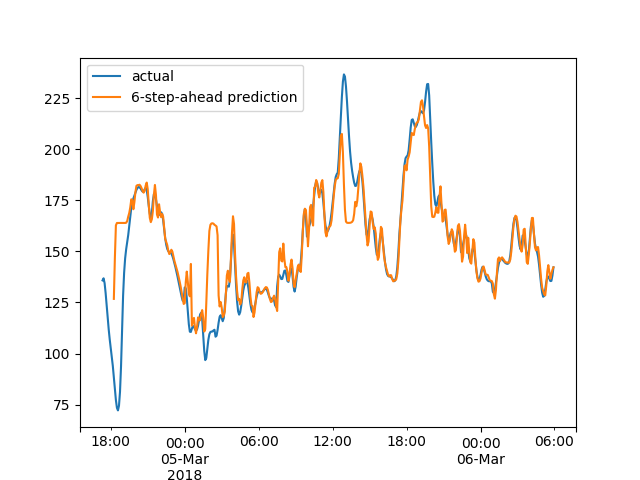

In [9]:
ytest.plot(label='actual')
ypred.plot(label='6-step-ahead prediction')
plt.legend()